C:\Users\aneek\AppData\Local\Temp\ipykernel_3560\2245663668.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d1['Rainfall']=d1['Rainfall'].replace('N',0)


Optimization terminated successfully.
         Current function value: 0.447677
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Rainfall   No. Observations:                  140
Model:                          Logit   Df Residuals:                      137
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                  0.3463
Time:                        16:39:53   Log-Likelihood:                -62.675
converged:                       True   LL-Null:                       -95.880
Covariance Type:            nonrobust   LLR p-value:                 3.793e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.0292      3.418     -4.397      0.000     -21.728      -8.331
Avg_Temp       0.0402      0.

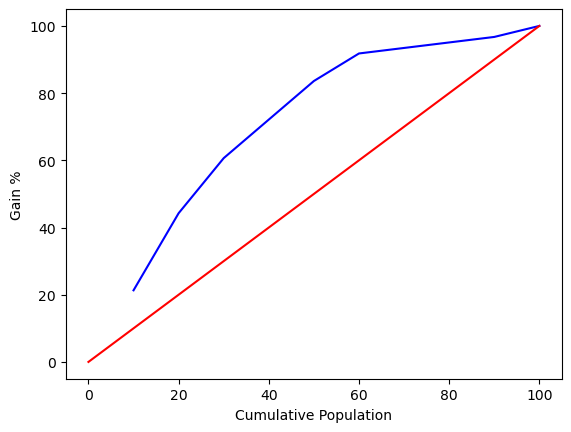

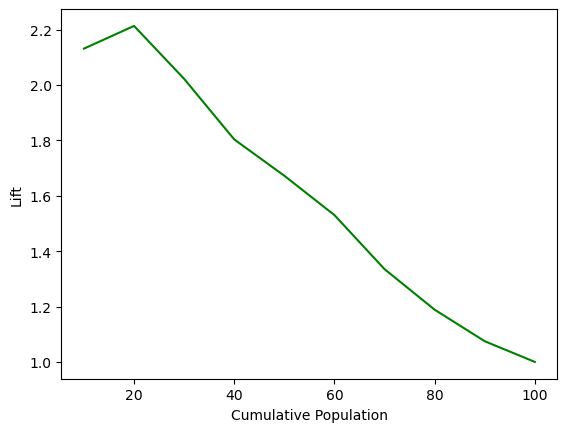

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 21 15:43:12 2025

@author: aneek
"""

import numpy as np
import os
#Using sm.Logit
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.set_option('display.max_column',None)
file_p='C:\\Users\\aneek\\Documents\\Upwork\\Upwork\\LR\\Wea_Kol1.xlsx'
os.chdir('C:\\Users\\aneek\\Documents\\Upwork\\Upwork\\LR')
d1=pd.read_excel(file_p)
d1['Rainfall']=d1['Rainfall'].replace('Y',1)
d1['Rainfall']=d1['Rainfall'].replace('N',0)
d1_train = d1.sample(n=140, random_state=35)
d1_test = d1.drop(d1_train.index)
#d1_test.to_csv('Logistic_test.csv')
d1_train=sm.add_constant(d1_train)
d1_test=sm.add_constant(d1_test)
Y_train=d1_train[['Rainfall']]
X_train=d1_train[['const','Avg_Temp','Avg_Hum']]
X_test=d1_test[['const','Avg_Temp','Avg_Hum']]
Y_test=d1_test[['Rainfall']]
logit_model = sm.Logit(Y_train, X_train)
result = logit_model.fit()
print(result.summary())
#predicted probabilities
pred_probs1=result.predict(X_test)
#predict classes
pred_classes1=(pred_probs1>=0.5).astype(int)
accuracy = accuracy_score(Y_test, pred_classes1)
print("Accuracy:", accuracy)
pred_classes2=(pred_probs1>=0.40).astype(int)
accuracy2 = accuracy_score(Y_test, pred_classes2)
print("Accuracy2:", accuracy2)
pred_classes3=(pred_probs1>=0.60).astype(int)
accuracy3= accuracy_score(Y_test, pred_classes3)
print("Accuracy3:", accuracy3)
p1=precision_score(Y_test, pred_classes1)
print("Precision:", p1)
p2=precision_score(Y_test, pred_classes2)
print("Precision:", p2)
p3=precision_score(Y_test, pred_classes3) #for 0.6
print("Precision:", p3)
cm1=confusion_matrix(Y_test, pred_classes1)
tn, fp, fn, tp = cm1.ravel()
npv1 = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv1)
cm2=confusion_matrix(Y_test, pred_classes2)
tn, fp, fn, tp = cm2.ravel()
npv2 = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv2)
cm3=confusion_matrix(Y_test, pred_classes3)
tn, fp, fn, tp = cm3.ravel()
npv3 = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv3)
s1=recall_score(Y_test, pred_classes1)
print("Sensitivity (Recall):", s1)
s2=recall_score(Y_test, pred_classes2)
print("Sensitivity (Recall):", s2)
s3=recall_score(Y_test, pred_classes3)
print("Sensitivity (Recall):", s3)
cm1 = confusion_matrix(Y_test, pred_classes1)
tn, fp, fn, tp = cm1.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)
cm2 = confusion_matrix(Y_test, pred_classes2)
tn, fp, fn, tp = cm2.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)
cm3 = confusion_matrix(Y_test, pred_classes3)
tn, fp, fn, tp = cm3.ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)
f1=f1_score(Y_test, pred_classes1)
print("F1-score:", f1)
f1=f1_score(Y_test, pred_classes2)
print("F1-score:", f1)
f1=f1_score(Y_test, pred_classes3)
print("F1-score:", f1)
params=result.params
for param in params.index:
    print(f"{param:<20} {params[param]:20.7f}")
model1=result
actual_target1=Y_train.copy()
X1=X_train.copy()
def lift_chart(X,actual_target,model):
    avg_tgt = actual_target.sum()/len(actual_target)
    df_data = X.copy()
    X_data = df_data.copy()
    df_data['Actual'] = actual_target
    df_data['Predict']= model.predict(X_data)
    #y_Prob = pd.DataFrame(model.predict_proba(X_data))
    df_data['Prob_1']=list(df_data['Predict'])
    df_data.sort_values(by=['Prob_1'],ascending=False,inplace=True)
    df_data.reset_index(drop=True,inplace=True)
    df_data['Decile']=pd.qcut(df_data.index,10,labels=False)
    output_df = pd.DataFrame()
    grouped = df_data.groupby('Decile',as_index=False)
    output_df['Max_Scr']=grouped.max().Prob_1
    output_df['Min_Scr']=grouped.min().Prob_1
    output_df['Actual']=grouped.sum().Actual
    output_df['Total']=grouped.count().Actual
    output_df["Population_perc"] = (output_df["Total"]/len(actual_target))*100
    output_df['Per_Events'] = (output_df['Actual']/output_df['Actual'].sum())*100
    output_df['Gain_Percentage'] = output_df.Per_Events.cumsum()
    output_df["Cumulative_Population"] = output_df.Population_perc.cumsum()
    output_df["Lift"] = output_df["Gain_Percentage"]/output_df["Cumulative_Population"]
    return output_df
S1=lift_chart(X1,actual_target1,model1)
x_values1=[0,100]
y_values1=[0,100]
plt.plot(S1[['Cumulative_Population']],S1[['Gain_Percentage']], 'b-', label='Gain Chart')
plt.plot(x_values1, y_values1, 'r-')
plt.ylabel('Gain %')
plt.xlabel('Cumulative Population')
plt.show()
fig, ax = plt.subplots()
ax.plot(S1[['Cumulative_Population']],S1[['Lift']],'g-')
plt.ylabel('Lift')
plt.xlabel('Cumulative Population')
plt.show()